In [1]:
#importing modules
import numpy as np
import pandas as pd
import opendatasets as od
import os
from sklearn.model_selection import train_test_split

In [2]:
#collecting data
od.download("https://www.kaggle.com/competitions/titanic/data")

Skipping, found downloaded files in ".\titanic" (use force=True to force download)


In [3]:
path = 'titanic/train.csv'

In [4]:
data = pd.read_csv(path,index_col=0)

In [5]:
#Exploratory Data Analysis
data.head()
#survived is 1  and not survived is 0
#Pclass is which tier
#SibSp Spouses on Titanic
#Parch Children aboard the Titanic
# The value of cabin can be filled by feature engineering

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
path2 = 'titanic/test.csv'

In [7]:
test = pd.read_csv(path2,index_col = 0)

In [8]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
data.shape

(891, 11)

In [10]:
test.shape

(418, 10)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [14]:
data.isnull().sum() #or data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns # we use it here to see the Bar Chart for categorical features as PClass, Sex,SibSp,Parch,Embarked,Cabin

In [16]:
def barchart(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

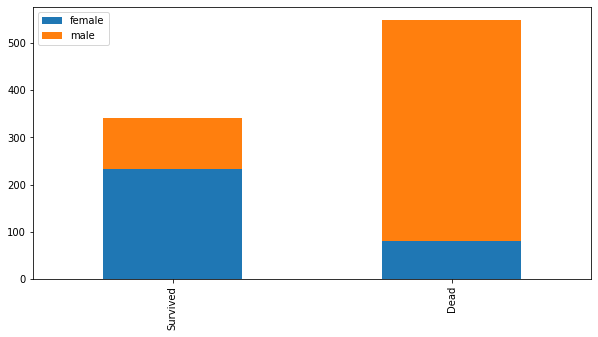

In [17]:
barchart('Sex')#chart confirms women survived more than men

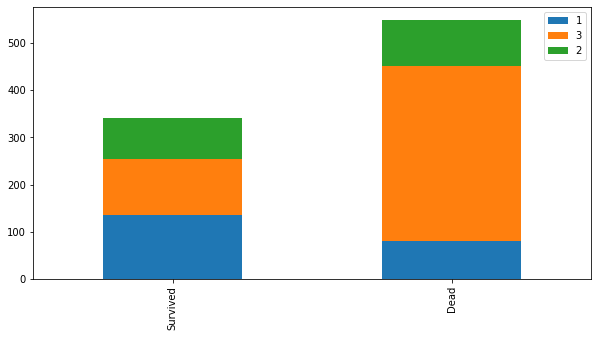

In [18]:
barchart('Pclass')#1st class survived more than 2nd then 3rd class

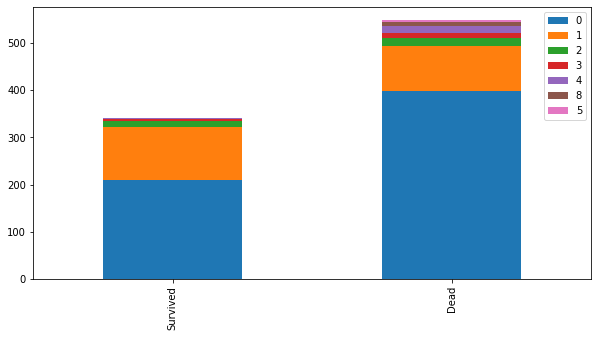

In [19]:
barchart("SibSp") #No siblings or spouse died

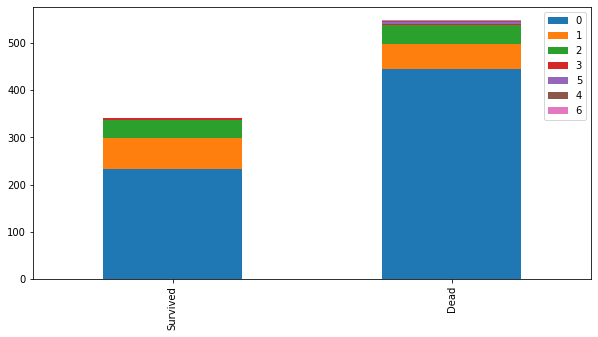

In [20]:
barchart("Parch")#with 0 children died mostly

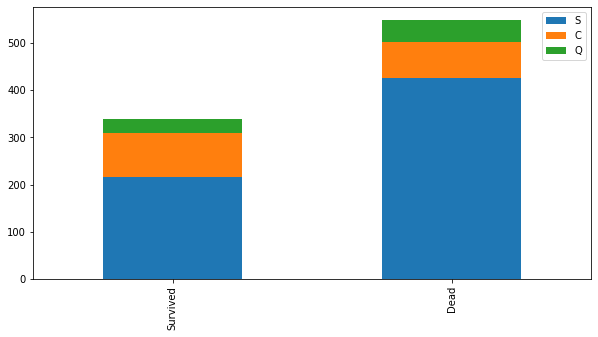

In [21]:
barchart("Embarked")#Mostly S embarked people died and C mostly survived

In [22]:
#lets see what is feature engineering
'''It is process of using domain knowledge of data to create features(feature vectors that refer to column values) 
to make machine learning algo work. We use the feature learning to fill out the missing items and also to change the text to numeric value
We will also create important features from some features that are not useful'''

'It is process of using domain knowledge of data to create features(feature vectors that refer to column values) \nto make machine learning algo work. We use the feature learning to fill out the missing items and also to change the text to numeric value\nWe will also create important features from some features that are not useful'

In [23]:
#When we see the name section that is not that useful but the Mr., Mrs., and so on titile provide some info
train_test_data=[test,data]#as we are combining here the changes are reflected in all
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(" ([A-Za-z]+)\.",expand = True)#title is created and then title is extracted from name

In [24]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [25]:
"""Now we will map the title name as
Mr. 0
Miss. 1
Mrs. 2
Others 3"""
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,'Dr':3,'Rev':3,'Mlle':3,'Major':3,'Col':3,'Countess':3,'Capt':3,'Ms':3,
               'Sir':3,'Lady':3,'Mme':3,'Don':3,'Jonkheer':3}

In [26]:
for dataset in train_test_data:#doing nothing but just mapping it onto the column with int
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [27]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


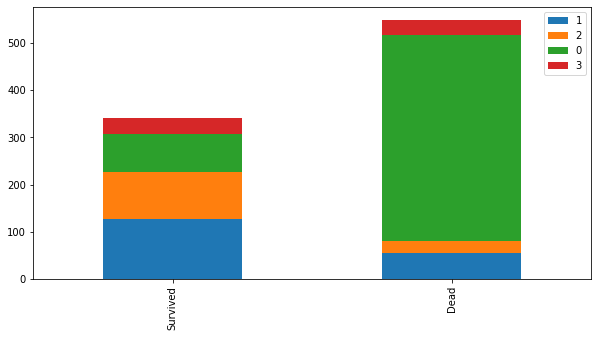

In [29]:
barchart('Title')#we can conclude that women with Miss is name prolly survive

In [30]:
data.drop('Name',axis=1, inplace=True)
test.drop('Name',axis=1 , inplace=True)

In [31]:
sex_mapping = {'male':0,'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [32]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [33]:
#now as age has missing field we just need median value of age that makes clusstered data more systemized
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'),inplace = True)#so what are we doing here is filling missing values by meadian of age grouped by each title
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace =True)

In [34]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3
888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,S,1


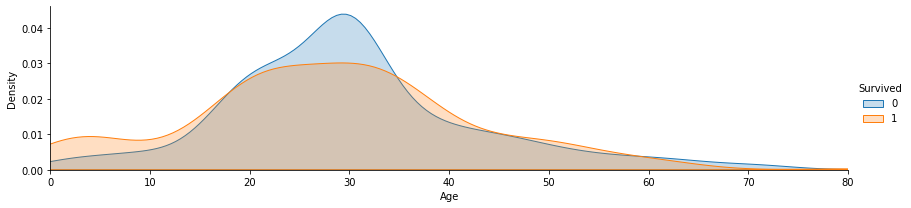

In [35]:
facet = sns.FacetGrid(data,hue = 'Survived',aspect = 4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim =(0,data['Age'].max()))
facet.add_legend()
plt.show()

In [36]:
#comparative chances to survive or die can be compared to see closely set xlim as =(the interval)

(0.0, 16.0)

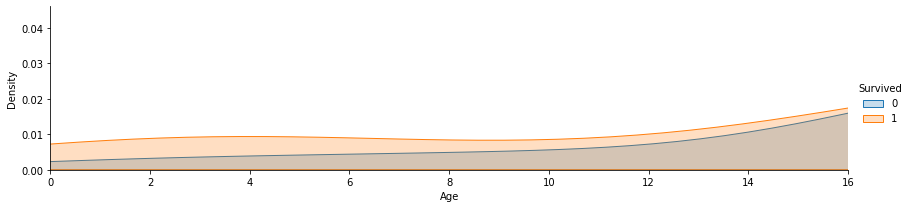

In [37]:
facet = sns.FacetGrid(data,hue = 'Survived',aspect = 4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim =(0,data['Age'].max()))
facet.add_legend()
plt.xlim(0,16)#child

(16.0, 35.0)

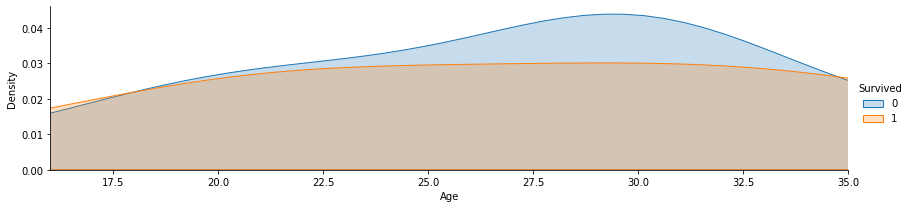

In [38]:
facet = sns.FacetGrid(data,hue = 'Survived',aspect = 4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim =(0,data['Age'].max()))
facet.add_legend()
plt.xlim(16,35)#young

(35.0, 60.0)

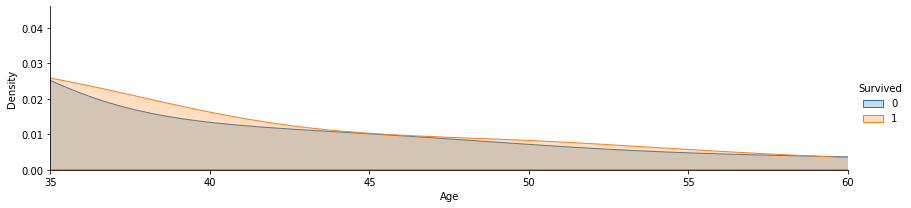

In [39]:
facet = sns.FacetGrid(data,hue = 'Survived',aspect = 4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim =(0,data['Age'].max()))
facet.add_legend()
plt.xlim(35,60)#middle age

(60.0, 80.0)

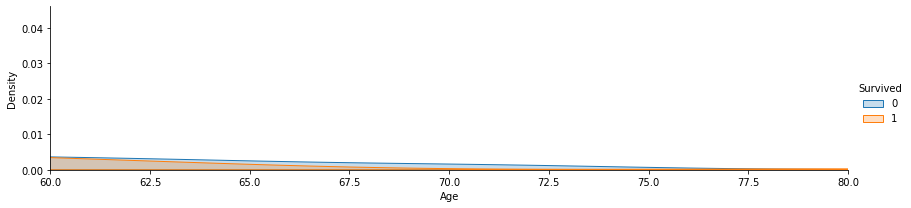

In [40]:
facet = sns.FacetGrid(data,hue = 'Survived',aspect = 4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim =(0,data['Age'].max()))
facet.add_legend()
plt.xlim(60,80)#high chance to die senior

In [41]:
#Binning is converting numerical data to categorical data
''' child :0
young:1
middle age :2
senior :3'''
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16,['Age']]=0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=35),['Age']]=1
    dataset.loc[(dataset['Age']>35)&(dataset['Age']<=60),['Age']]=2
    dataset.loc[dataset['Age']>60,['Age']]=3

In [42]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,1,1.0,1,0,113803,53.1000,C123,S,2
5,0,3,0,1.0,0,0,373450,8.0500,NaN,S,0


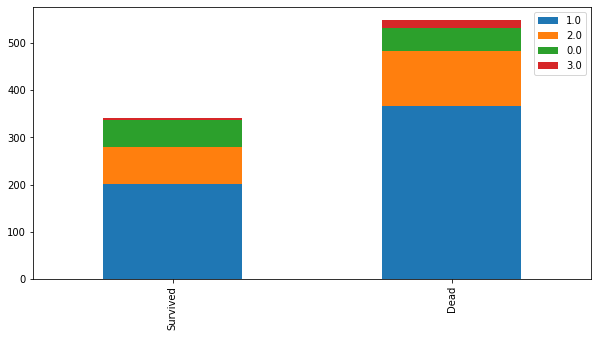

In [43]:
barchart("Age")

In [44]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

<AxesSubplot:>

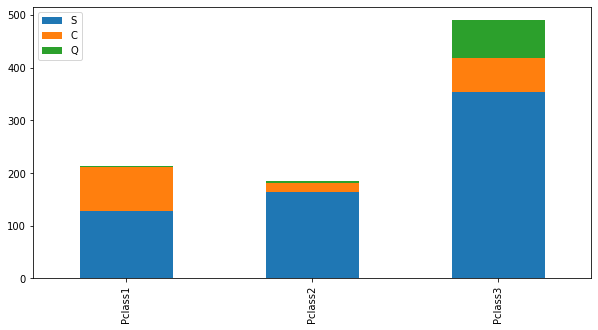

In [45]:
#now we deal with embarked we relate what Pclass is taken from which embarkment
Pclass1 = data[data['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = data[data['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = data[data['Pclass'] == 3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["Pclass1",'Pclass2','Pclass3']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [46]:
#class 1 more than 50% from s
# class 2 more than 50 from s
#class 3 more than 50 from s

In [47]:
#filling s
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [48]:
#converting embarked to int
embarked_mapping={'S':0,'Q':1,'R':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [49]:
#Now we will fill fare with median of fare same reason the clusterring will be less and for each c;ass as thats how the fare changes
data['Fare'].fillna(data.groupby('Pclass')['Fare'].transform('median'),inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace = True)

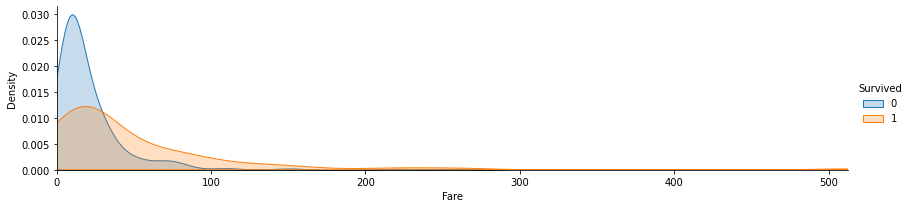

In [50]:
facet = sns.FacetGrid(data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',fill = True)
facet.set(xlim=(0,data['Fare'].max()))
facet.add_legend()
plt.show()

(0.0, 30.0)

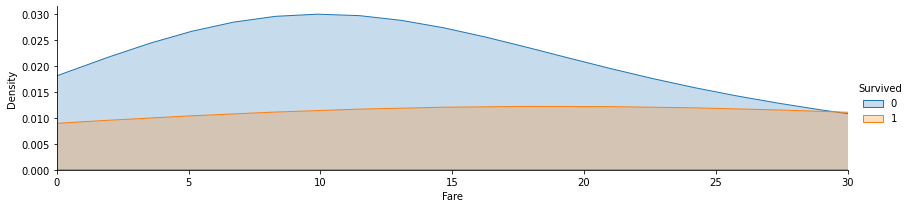

In [51]:
facet = sns.FacetGrid(data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',fill = True)
facet.set(xlim=(0,data['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

(30.0, 100.0)

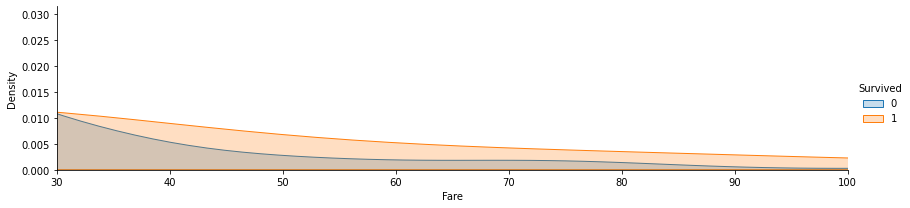

In [52]:
facet = sns.FacetGrid(data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',fill = True)
facet.set(xlim=(0,data['Fare'].max()))
facet.add_legend()
plt.xlim(30,100)

In [53]:
#we do binning again for <30 : 0 ,30-100:1,100> :2
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=30,'Fare']  = 0
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100)]=1
    dataset.loc[(dataset['Fare']>100)] =2

In [54]:
#deal is cabin as we know that first letter is alphabet lets extract it
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

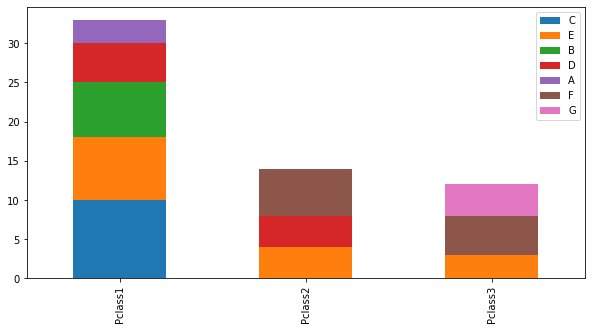

In [55]:
Pclass1 = data[data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = data[data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = data[data['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=["Pclass1",'Pclass2','Pclass3']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [56]:
#We can see ABC are in 1st class only and rest follow up
#we will map again then
#maintaining equal distance is a must otherwise the classifier model might mess up
cabin_mapping ={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4}#we use such values as there is some range we have chosen which is 3 for most features therefore we use those values
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [57]:
data['Cabin'].fillna(data.groupby('Pclass')['Cabin'].transform("median"),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform("median"),inplace=True)

In [58]:
#next we will see family size
data['FamilySize'] = data['SibSp'] + data['Parch']+1
test['FamilySize'] = data['SibSp'] + data['Parch']+1

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


(0.0, 7.0)

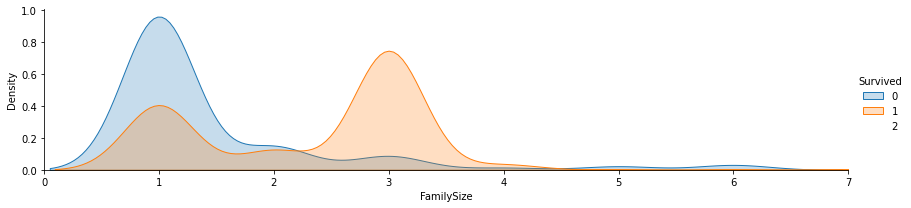

In [59]:
#create graph
facet = sns.FacetGrid(data,hue = 'Survived',aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill=True)
facet.set(xlim=(0,data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [60]:
family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2.0,8:2.8}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [61]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0.0,0,0.4
2,1,1,1,1.0,1,1,1,1.0,0.8,1.0,1,0.8
3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0.0,1,0.0
4,1,1,1,1.0,1,1,1,1.0,0.8,1.0,1,0.8
5,0,3,0,1.0,0,0,373450,0.0,2.0,0.0,0,0.0


In [68]:
data =  data.drop(['SibSp','Parch','Ticket'],axis=1)
test = test.drop(['Parch','SibSp','Ticket'],axis=1)

In [69]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,,
1,0,3,0,1.0,0.0,2.0,0.0,0,0.4
2,1,1,1,1.0,1.0,0.8,1.0,1,0.8
3,1,3,1,1.0,0.0,2.0,0.0,1,0.0
4,1,1,1,1.0,1.0,0.8,1.0,1,0.8
5,0,3,0,1.0,0.0,2.0,0.0,0,0.0


In [70]:
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,
892,3,0,1.0,0.0,2.0,1.0,0.0,NaN
893,3,1,2.0,0.0,2.0,0.0,2.0,NaN
894,2,0,3.0,0.0,2.0,1.0,0.0,NaN
895,3,0,1.0,0.0,2.0,0.0,0.0,NaN
896,3,1,1.0,0.0,2.0,0.0,2.0,NaN


In [72]:
y='Survived'
X=data.drop('Survived',axis=1).columns

In [73]:
X

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Title',
       'FamilySize'],
      dtype='object')